# Task 1 : EDA on Retail Sales Data

### 1. Data Importing and Cleaning


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importing Dataset
df = pd.read_csv('Retail Sales Data.csv')

In [3]:
# Looking at the dataset
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


##### Dataset Information

In [4]:
# Row Count
rows = df.shape[0]
# Column Count
column = df.shape[1]
print("Number of rows: ",rows)
print("Number of columns: ",column)

Number of rows:  1000
Number of columns:  9


In [5]:
# Looking at info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
# Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# Looking for Null Values 
missing_values = df.isnull().sum()
missing_values
# found none in the set

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

##### Variables in the Dataset

In [8]:
# This is a list containing all variables in the set
list(df.columns)

['Transaction ID',
 'Date',
 'Customer ID',
 'Gender',
 'Age',
 'Product Category',
 'Quantity',
 'Price per Unit',
 'Total Amount']

##### Variables Description
* __Transaction ID:__ A unique id for each transaction.

* __Date:__ The date when the transaction happened.

* __Customer ID:__ Its is an unique id for each customer.
 
* __Gender:__ The gender of the customer (Male/Female).

* __Age:__ Age of the customer.

* __Product Category:__ The category of the purchased product.

* __Quantity:__ The total number of units of the product purchased by a specific customer.


### 2. Descriptive Statistics

In [9]:
# Overview of Statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Overview of the Dataset shows stats like Mean, Standard Deviation, Percentiles like Q1, Q3 & Median(Q2) along with Max and Min of the set.

In [10]:
# Finding mode as it is not calculated in overview
mode_of_df = df.mode()
# Print mode
mode_of_df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0
1,2,NaN,CUST002,NaN,64.0,NaN,NaN,NaN,NaN
2,3,NaN,CUST003,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,CUST004,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,CUST005,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,996,NaN,CUST995,NaN,NaN,NaN,NaN,NaN,NaN
996,997,NaN,CUST996,NaN,NaN,NaN,NaN,NaN,NaN
997,998,NaN,CUST997,NaN,NaN,NaN,NaN,NaN,NaN
998,999,NaN,CUST998,NaN,NaN,NaN,NaN,NaN,NaN


Result of Transaction ID and Customer ID is NaN because both of them are unique, so there is no mode.

Mode of Date column is "2023-05-16".

For other columns, Mode is as follows Gender : "Female", Age: "43.0", Product Category: "Clothing", Quantity: "4.0", 
Price per Unit:"50.0" , Total Amount: "50.0".

### 3. Time series analysis

In [11]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Creating a new column named "month"
df['month'] = df['Date'].dt.month_name()

In [13]:
# Creating a new column named "Day of The Week"
df['DayofWeek'] = df['Date'].dt.day_name()

In [14]:
# Finding the Monthly and Daily Sales
monthly_sales = df.groupby('month')['Quantity'].sum()
daily_sales = df.groupby('DayofWeek')['Quantity'].sum()

In [15]:
# Busiest Month and Day
busiest_month = monthly_sales.idxmax()
busiest_day = daily_sales.idxmax()

In [16]:
# Getting the Busiest Day and Month printed
print("Busiest month (in terms of sales) is: ",busiest_month)
print("Busiest day (in terms of sales) is: ",busiest_day)

Busiest month (in terms of sales) is:  May
Busiest day (in terms of sales) is:  Tuesday


In [17]:
# Checking the Dataset with New Month Column
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month,DayofWeek
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,Saturday


##### 4. Product and Customer Analysis

Firstly doing __Product Analysis__

In [18]:
# Average price per unit according to Product category
avg_price_per_category = df.groupby('Product Category')['Price per Unit'].mean().sort_values(ascending=False)
avg_price_per_category

Product Category
Beauty         184.055375
Electronics    181.900585
Clothing       174.287749
Name: Price per Unit, dtype: float64

In [19]:
# Statistical POV for average price per unit
avg_price_summary = avg_price_per_category.describe()
avg_price_summary

count      3.000000
mean     180.081236
std        5.131681
min      174.287749
25%      178.094167
50%      181.900585
75%      182.977980
max      184.055375
Name: Price per Unit, dtype: float64

In [20]:
# Extracting The sum of the Quantity sold for each Product Category
product_quan_sale = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
product_quan_sale

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

In [21]:
# Statistical Summary of quantity sold by product category
quan_summ = product_quan_sale.describe()
quan_summ

count      3.000000
mean     838.000000
std       62.233432
min      771.000000
25%      810.000000
50%      849.000000
75%      871.500000
max      894.000000
Name: Quantity, dtype: float64

Now __Customer Analysis__

In [22]:
# Checking the distribution of the Demographics (Gender)
gender_dis = df['Gender'].value_counts()
gender_dis

Gender
Female    510
Male      490
Name: count, dtype: int64

In [23]:
# Analyzing the Different Stats by Customer Age
age_summary = df['Age'].describe()
age_summary

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

In the __Analysis of the Products__ we can see that The Average price of Clothing products is low, Because of it quantity sold by this Category is Highest. Demographics like Age in __Customer Analysis__ shows that, Average of the Customer is 41.In Gender terms, Females are bit more than Males

##### 5. Visualization of the Data

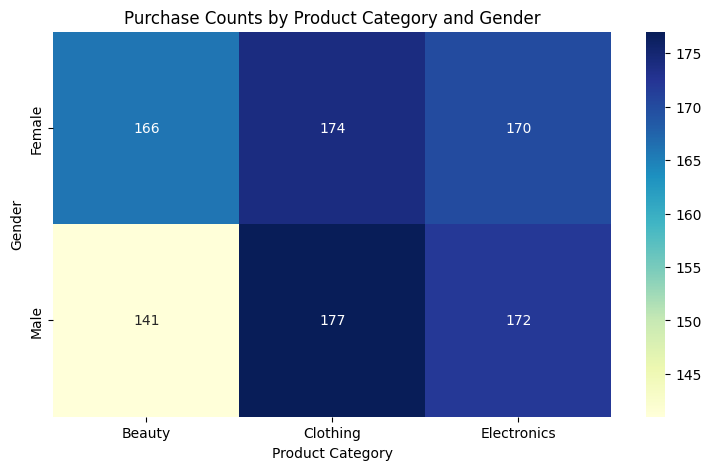

In [24]:
# Group by 'Gender' and 'Product Category', and Checking the Frequency of happening
gender_product_counts = df.groupby(['Gender', 'Product Category']).size().unstack(fill_value=0)

# Plot the count of purchases by product category for each gender
plt.figure(figsize=(9, 5))
sns.heatmap(gender_product_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Purchase Counts by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()

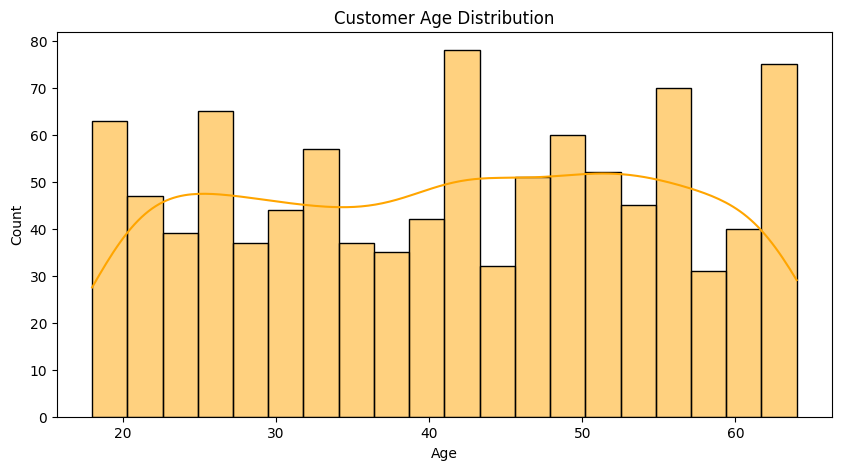

In [25]:
# Plot distribution of customer age
plt.figure(figsize = (10,5))
sns.histplot(df['Age'],kde=True, bins=20, color='orange')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

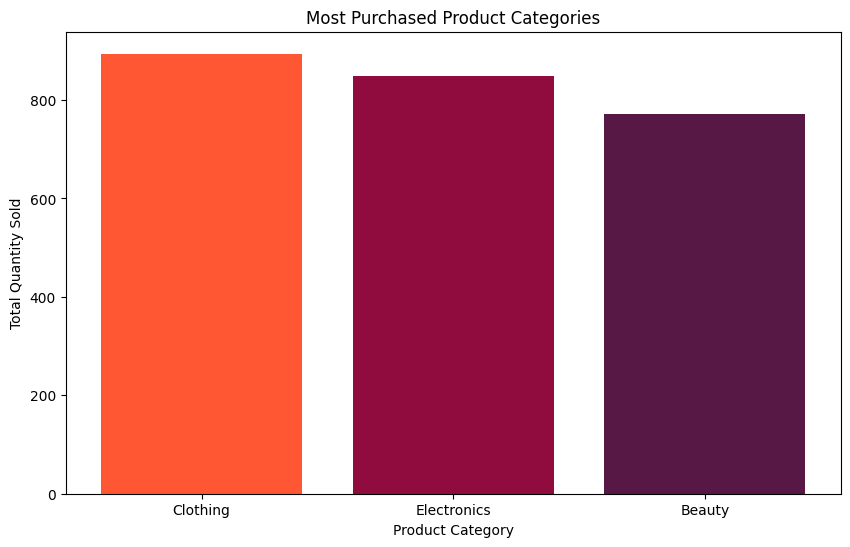

In [26]:
# Calculating the product preferences
product_preferences = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Forming a bar plot to see the Most Preferred Product Category comparatively 
plt.figure(figsize=(10, 6))
plt.bar(product_preferences.index,product_preferences.values, color = ('#FF5733','#900C3F', '#581845','#FF9955','#66b3ff','#C54E4E'))
plt.title('Most Purchased Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

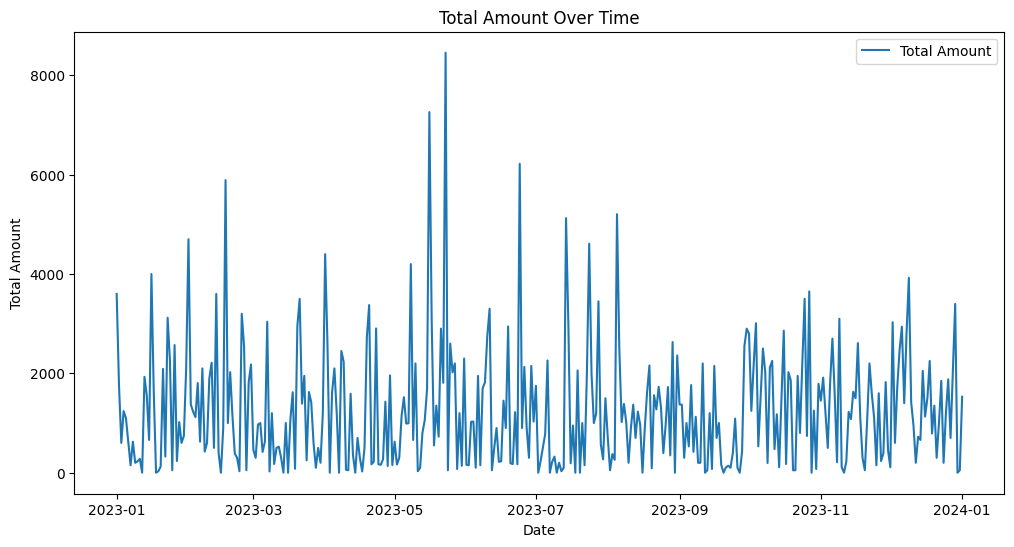

In [27]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Resampling the data to daily frequency
df_daily = df.resample('D').sum()

# Plot total amount over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Total Amount'], label='Total Amount')
plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

##### 6. Recommendations

Based on the my analysis of the dataset, here are several targeted recommendations to enhance sales performance as well as commercial activities:-

* __Analyze Bestsellers:__ Identify top-selling products across categories to focus marketing efforts and inventory management on these items.
* __Diversify Product Range:__ Introduce complementary products based on customer preferences observed in the dataset, especially in high-demand categories like Electronics and Beauty.
* __Loyalty Programs:__ Implement loyalty programs that reward repeat purchases, encouraging customers to return and increase their overall spending
* __E-commerce Optimization:__ Invest in an e-commerce platform that is user-friendly and optimized for mobile devices, as many customers may prefer online shopping.
* __Inventory Management:__ Implement better inventory management practices to ensure that popular items are always in stock while minimizing overstock of less popular products.